In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
base = pd.read_csv("Movies_new.csv")

# Understanding the dataset

In [ ]:
base.dtypes

Describe function show that the Budget and Revenue columns has 0 as a min values, however, the info() function showed that there isnt any NaN value

In [ ]:
base.describe()
base.info()
base.count()
base.isnull().sum()

This function replace all 0 value to NaN and then it is possible to fill this values with the median of the specific column

In [ ]:
replace = base.replace(0, np.nan, inplace=True)

In [ ]:
budget_median = base.Budget.median()
revenue_median = base.Revenue.median()

In [ ]:
base["Budget"].fillna(budget_median, inplace = True)
base["Revenue"].fillna(revenue_median, inplace = True)

It's possible to save another csv with all columns complete

In [ ]:
base.to_csv("Movies_median.csv", index=False)

# Graph Analysis

In [ ]:
sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols=2, figsize = (12,6), sharey=True)
fig.suptitle("Comparison between User Rating and Movie Database Average Ratings", fontsize=16)
plt.subplots_adjust(wspace=0, hspace=0)
plt.ylim(1,5)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})
sns.despine(left= True)



user_boxplot = sns.boxplot(y = base["Rating"], 
                            color="lightskyblue", 
                            showmeans=True, 
                            meanprops= {"marker":"o",
                                        "markerfacecolor":"white", 
                                        "markeredgecolor":"black", 
                                        "markersize":"7"},
                            medianprops = {"color":"orange", 
                                           "linestyle":"--"}, 
                            ax=axs[0])


database_boxplot = sns.boxplot(y = base["Vote Average"], 
                           color="violet", 
                           showmeans=True,
                           meanprops= {"marker":"o",
                                       "markerfacecolor":"white", 
                                       "markeredgecolor":"black", 
                                       "markersize":"7"},
                           medianprops = {"color":"springgreen", 
                                          "linestyle":"--"},
                           ax=axs[1]).set(ylabel=None)

plt.savefig("Boxplot_ratings")

Transform the genres in a df of genres

In [ ]:
get_genres = base.Genres.str.split("|", expand = True)

Finding the linear correlation between Budget and Revenue

In [ ]:
sns.set_style("white")
ax = sns.scatterplot(x=base['Budget'], y=base['Revenue'])  
ax.set_yscale('log')
ax.set_xscale('log')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(base.Budget, base.Revenue)

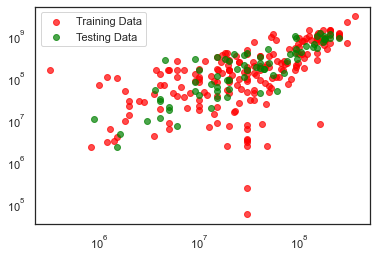

In [110]:
plt.scatter(X_train,y_train, label = "Training Data", color = "r", alpha= .7)
plt.scatter(X_test,y_test, label = "Testing Data", color = "g", alpha= .7)
plt.legend()
plt.yscale('log')
plt.xscale('log')


In [116]:
lr = LinearRegression()
lr.fit(X_train.values.reshape(-1,1), y_train.values)

LinearRegression()

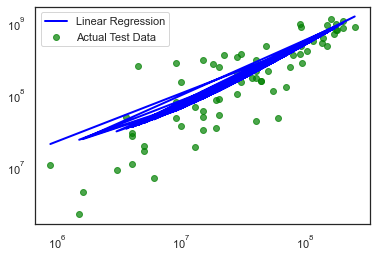

In [111]:
prediction = lr.predict(X_test.values.reshape(-1,1))
plt.plot(X_test,prediction,label = "Linear Regression", color = "b")
plt.scatter(X_test,y_test, label = "Actual Test Data", color = "g", alpha=.7)
plt.legend()
plt.yscale('log')
plt.xscale('log')

In [ ]:
sns.distplot(base['Budget'])


In [ ]:
corre = np.corrcoef(base["Budget"],base["Revenue"])